In [4]:
import os
import dlib
import imutils
import cv2
import argparse

import math
import matplotlib.pyplot as plt
import numpy as np

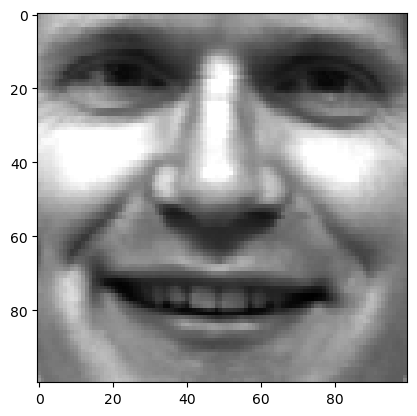

In [5]:
directory = 'images/'
im_file = directory + 'subject01_happy.png'

# im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im, cmap='gray')

im_crop = im[100:200, 130:230]

plt.imshow(im_crop, cmap='gray')

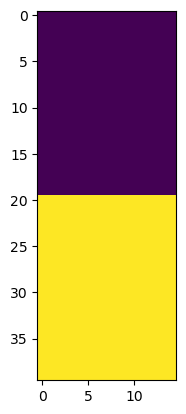

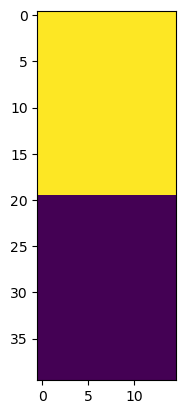

In [25]:
ysize = 20
xsize = 15

#haar = np.concatenate((np.concatenate((np.zeros([xsize, ysize]), np.ones([xsize, ysize])), axis=0), (np.zeros([xsize, ysize]))), axis=0) - 0.5
haar = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
plt.imshow(haar)
plt.show()


#ysize2 = 20
xsize2 = 25

#haar_inv = haar * -1
plt.imshow(haar_inv)
plt.show()

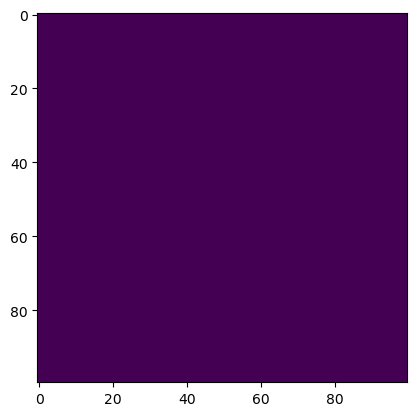

In [27]:
haar_fil1 = cv2.filter2D(src=im_crop, ddepth=-1, kernel=haar_inv)
haar_thresh = (haar_fil1 < np.min(haar_fil1) * 0.5) * 1.0
plt.imshow(haar_thresh)
plt.show()

In [ ]:
# this is a pretty naive approach.
# finding a way to explicitly trace the curve of the lips would be helpful. 
# unfortunately cannot find anything on how to do that yet.
# also will need to adjust this to process surprised faces.

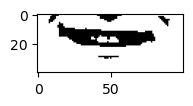

In [62]:
ret, thresh = cv2.threshold(im_crop, 80, 255, cv2.THRESH_BINARY)
# visualize the binary image
thresh = thresh[60:, :]

plt.subplot(2, 3, 1),plt.imshow(thresh, 'gray', vmin=0, vmax=255)
plt.show()

[-0.00778898  0.7445225  -1.2528733 ]


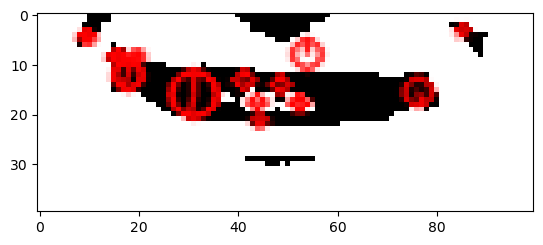

In [74]:
features = cv2.SIFT_create() 
  
keypoints = features.detect(thresh, None)
# print(keypoints[0].pt, keypoints[0].pt[0], len(keypoints))

kp_len = len(keypoints)

xcoords = np.zeros(kp_len)
ycoords = np.zeros(kp_len)

for i in range(kp_len):
    xcoords[i] = keypoints[i].pt[0]
    ycoords[i] = keypoints[i].pt[1]

coeffs = np.polyfit(xcoords, ycoords, 2)
print(coeffs)

# the first coefficient determines if the curve is up or down
# the axes are flipped so multiply by -1
result = coeffs[0] * -1
  
output_image = cv2.drawKeypoints(thresh, keypoints, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
  
plt.imshow(output_image) 
plt.show() 

In [80]:
if (result > 0): 
    print("Subject is happy!")
elif (result < -0.001):
    print("Subject is sad.")
else:
    print("Subject is neutral.")

Subject is happy!


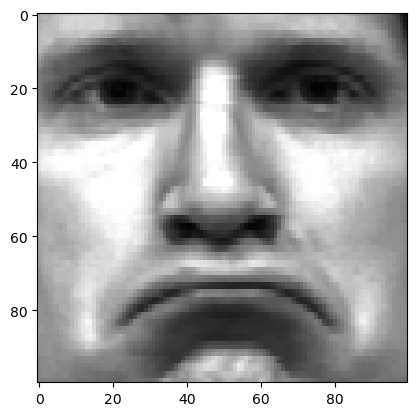

In [39]:
# test 2
im_file2 = directory + 'subject01_sad.png'

# im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = cv2.imread(im_file2, cv2.IMREAD_GRAYSCALE)

# plt.imshow(im2, cmap='gray')

im_crop2 = im2[95:195, 135:235]

plt.imshow(im_crop2, cmap='gray')

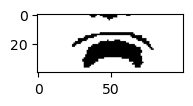

In [40]:
ret2, thresh2 = cv2.threshold(im_crop2, 80, 255, cv2.THRESH_BINARY)
# visualize the binary image
thresh2 = thresh2[60:, :]

plt.subplot(2, 3, 1),plt.imshow(thresh2, 'gray', vmin=0, vmax=255)
plt.show()

[ 1.17898856e-02 -1.21795975e+00  4.93676847e+01]


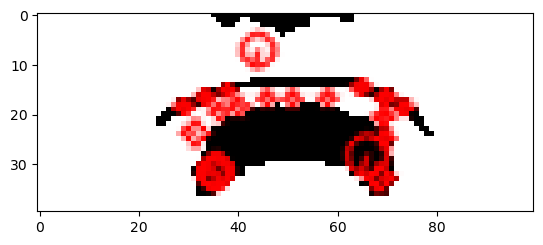

In [68]:
features2 = cv2.SIFT_create() 
  
keypoints2 = features.detect(thresh2, None)
# print(keypoints[0].pt, keypoints[0].pt[0], keypoints[0].pt[1], len(keypoints))

kp_len2 = len(keypoints2)

xcoords2 = np.zeros(kp_len2)
ycoords2 = np.zeros(kp_len2)

for i in range(kp_len2):
    xcoords2[i] = keypoints2[i].pt[0]
    ycoords2[i] = keypoints2[i].pt[1]

# print(xcoords)
# print(ycoords)

coeffs2 = np.polyfit(xcoords2, ycoords2, 2)
print(coeffs2)

# the first coefficient determines if the curve is up or down
# the axes are flipped so multiply by -1
result2 = coeffs2[0] * -1
  
output_image = cv2.drawKeypoints(thresh2, keypoints2, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
  
plt.imshow(output_image) 
plt.show() 

In [79]:
if (result2 > 0): 
    print("Subject is happy!")
elif (result2 < -0.001):
    print("Subject is sad.")
else:
    print("Subject is neutral.")

Subject is sad.
